# Augmentations

Augmentations improve generalization of the model by using specified transformations during training. They do not increase the number of samples in the dataset, instead, they transform the samples during training, so with each epoch training sees augmented image. The rate of augmentation is controled by [torchvision.transforms.RandomApply](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomApply.html). 

Augmentations can be found in [torchvision.transforms](https://pytorch.org/vision/main/transforms.html) module, or in [albumentations](https://albumentations.ai/) which claims to be fast.

In [ ]:
import torch
from torchvision.transforms import ColorJitter, RandomApply, ToTensor
from PIL import Image
import ipyplot
from PIL.ImageStat import Stat

# ColorJiter example

In [ ]:
jitter = ColorJitter(brightness=(0.2, 1.0), contrast=(0.3, 1.0))  # jitter will change every time it is called
applier = RandomApply(torch.nn.ModuleList([jitter]), p=0.3)

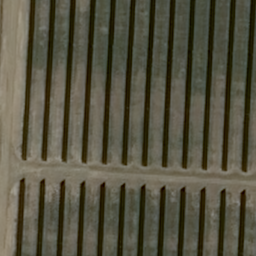

In [ ]:
im = Image.open('assets/image_20211012_row53_col1.png')
im

Note that `jitter` changes every time it is called, for example:

In [ ]:
im_tensor = ToTensor()(im)
j1 = jitter(im_tensor)
j2 = jitter(im_tensor)
assert not (j1 == j2).all()

[ColorJitter](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html) "randomly change the brightness, contrast, saturation and hue of an image". Just brightness (min,max) will be the range for mean and for stdev, while just contrast (min, max) will be the range for stdev only and affect brightness slighly.

## Brightness

In [ ]:
def print_stats(im, aug_imgs):
    mean_orig, stdev_orig = Stat(im).mean, Stat(im).stddev
    stats_mean = torch.zeros(len(aug_imgs), 3)
    stats_stdev = torch.zeros(len(aug_imgs), 3)
    for i, img in enumerate(aug_imgs):
        stats_mean[i,:] = torch.tensor(Stat(img).mean) / torch.tensor(mean_orig)
        stats_stdev[i,:] = torch.tensor(Stat(img).stddev) / torch.tensor(stdev_orig)
    print(f'Brightness min/max: {stats_mean.min():.02f} / {stats_mean.max():.02f}')
    print(f'Contrast min/max: {stats_stdev.min():.02f} / {stats_stdev.max():.02f}')


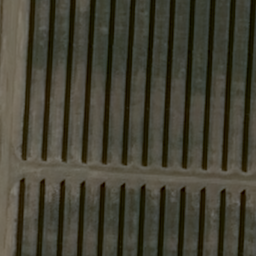
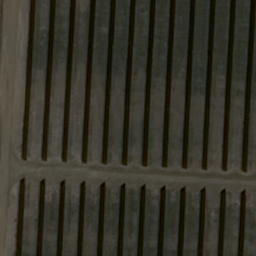
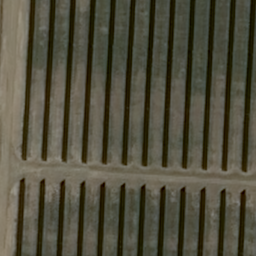
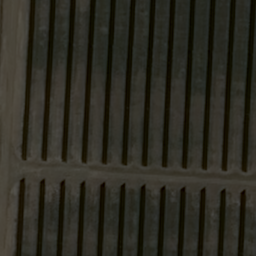
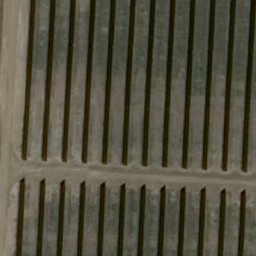
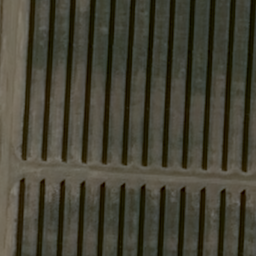


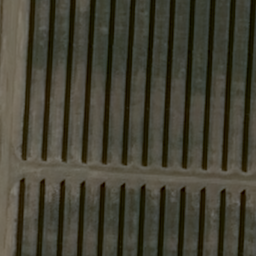
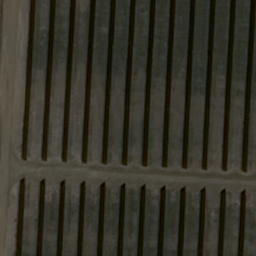
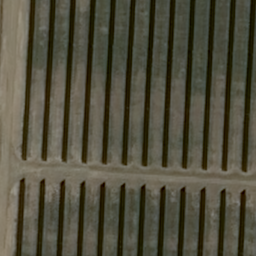
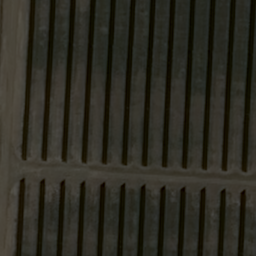
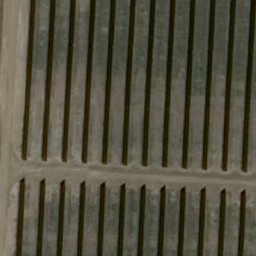
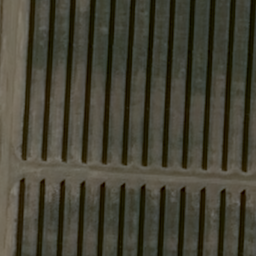

Brightness min/max: 0.50 / 0.98
Contrast min/max: 0.50 / 0.99


In [ ]:
aug_imgs = [ColorJitter(brightness=(0.5, 1))(im) for _ in range(100)]
ipyplot.plot_images(aug_imgs[:6])
print_stats(im, aug_imgs)

## Contrast


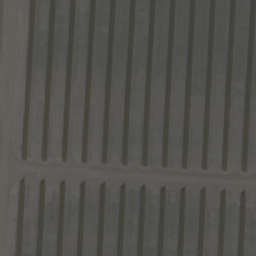
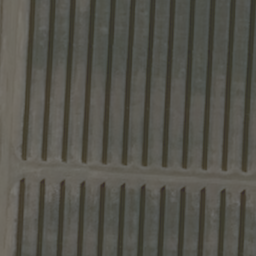
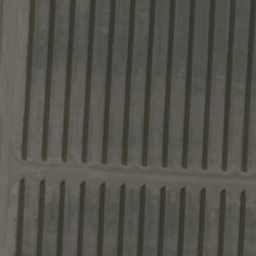
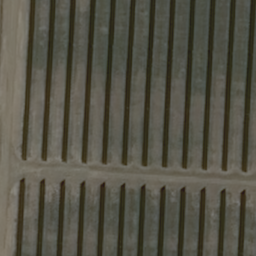
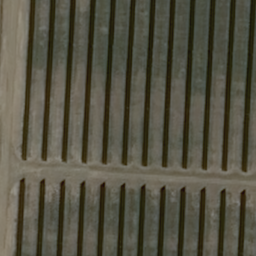
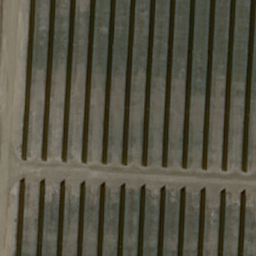


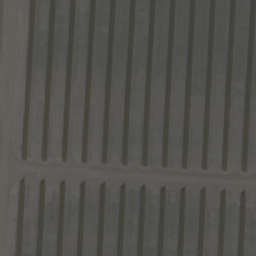
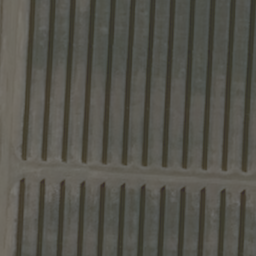
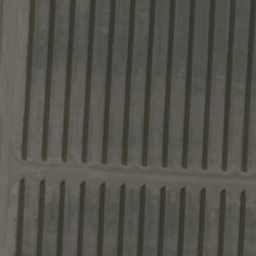
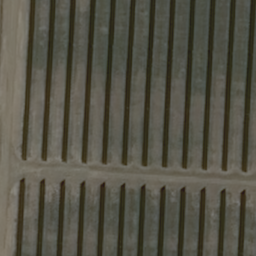
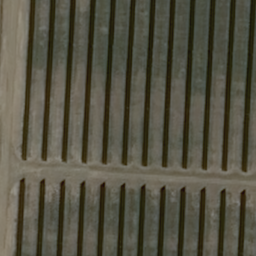
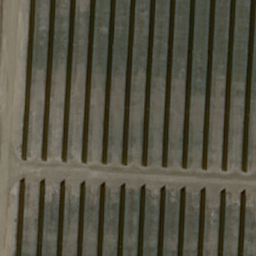

In [ ]:
aug_imgs = [ColorJitter(contrast=(0.25, 1))(im) for _ in range(100)]
ipyplot.plot_images(aug_imgs[:6])

## Brightness + contrast

Together the have cummuliteve effect:


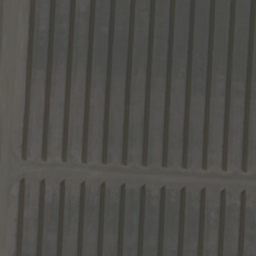
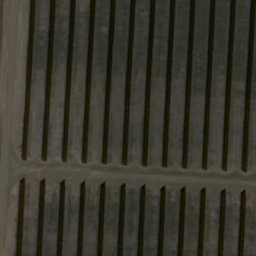
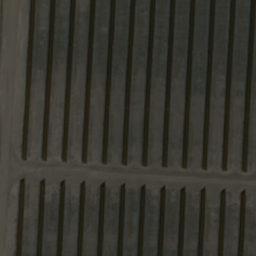
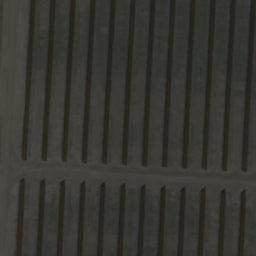
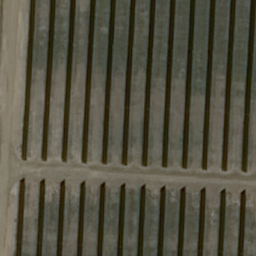
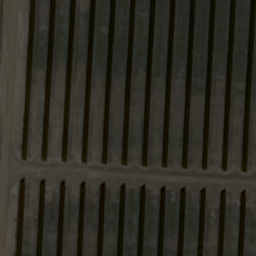


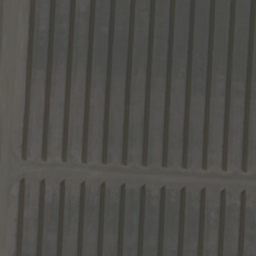
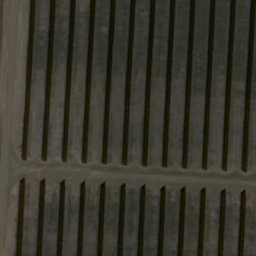
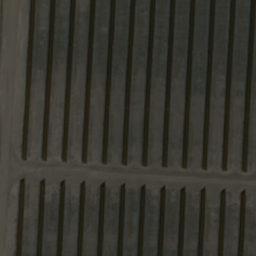
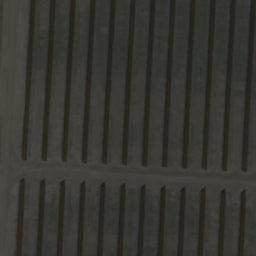
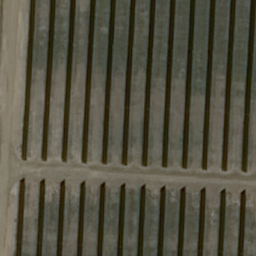
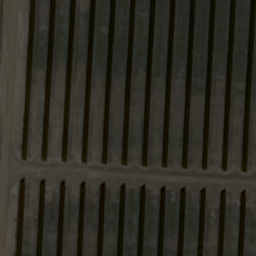

Brightness min/max: 0.48 / 1.13
Contrast min/max: 0.13 / 0.93


In [ ]:
aug_imgs = [ColorJitter(brightness=(0.5, 1), contrast=(0.25, 1))(im) for _ in range(100)]
ipyplot.plot_images(aug_imgs[:6])
print_stats(im, aug_imgs)